In [1]:
import jax
jax.config.update('jax_platform_name', 'cpu')
jax.config.update('jax_enable_x64', True)

import numpy as np
import matplotlib.pyplot as plt

from models import truncnorm
from models import truncated_powerlaw
from models import build_interp_sampler
from models import skewtruncnorm

from util import calc_chieff

%load_ext autoreload
%autoreload 2

In [2]:
def sample_iso_gauss_spin_tilt(rng, xi_spin, sigma_spin, mu_spin=1, n=1):
    u = rng.uniform(size=(n,))

    sample_tn = build_interp_sampler(
        lambda x: truncnorm(x, mu_spin, sigma_spin, 1, -1),
        np.linspace(-1, 1, 1_000),
        xp=np
    )

    return np.where(
        u < xi_spin,
        sample_tn(rng, size=(2, n)),
        rng.uniform(size=(2, n)) * 2 - 1
    )


def iso_gauss_spin_tilt_marg(ct, xi_spin, sigma_spin, mu_spin=1):
    return (1 - xi_spin) / 2 + xi_spin * truncnorm(ct, mu_spin, sigma_spin, high=1, low=-1) #* truncnorm(cos_tilt_1, mu_spin, sigma_spin, high=1, low=-1)

In [3]:
rng = np.random.default_rng(3)
ct1, ct2 = sample_iso_gauss_spin_tilt(rng, 0.97, 0.5, n=100_000)

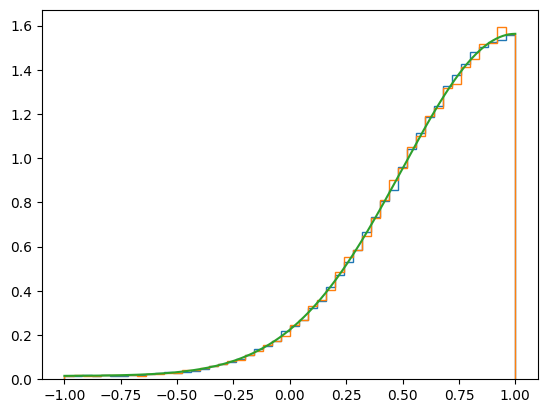

In [4]:
ks = dict(histtype='step', bins=50, density=True)

fig, ax = plt.subplots()
ax.hist(ct1, **ks)
ax.hist(ct2, **ks)
ax.plot(
    np.linspace(-1, 1, 1000),
    iso_gauss_spin_tilt_marg(np.linspace(-1, 1, 1000), 0.97, 0.5)
)

O4a-ish spin magnitude and mass ratio distributions

In [5]:
n = 100_000

In [6]:
sample_spin_tn = build_interp_sampler(
    lambda x: truncnorm(x, 0, 0.2, 1, 0),
    np.linspace(0, 1, 1_000),
    xp=np
)

In [7]:
rng = np.random.default_rng(1)
a1, a2 = sample_spin_tn(rng, (2, n))

Text(0.5, 0, '$a_{1,2}$')

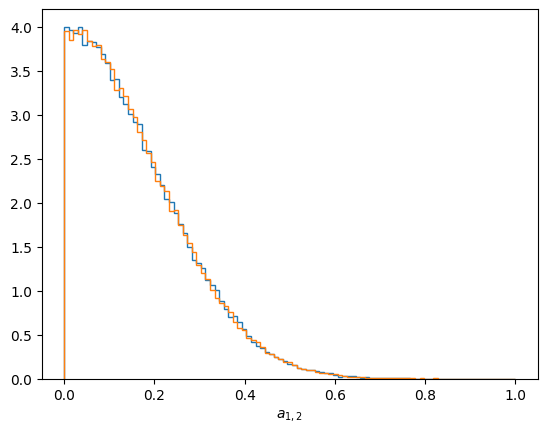

In [8]:
bins = np.linspace(0, 1, 100)
ks = dict(histtype='step', bins=bins, density=True)

fig, ax = plt.subplots()
ax.hist(a1, **ks)
ax.hist(a2, **ks)

ax.set_xlabel(r'$a_{1,2}$')

In [9]:
sample_q_pl = build_interp_sampler(
    lambda x: truncated_powerlaw(x, 1.1, 0.1, 1),
    np.linspace(0.1, 1, 1_000),
    xp=np
)

In [10]:
rng = np.random.default_rng(2)
q = sample_q_pl(rng, (n,))

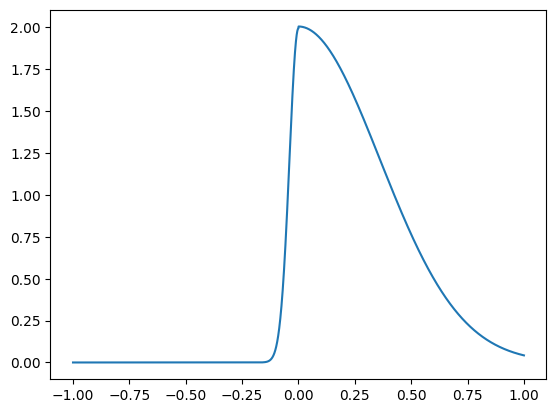

In [12]:
xs = np.linspace(-1, 1, 10_000)

fig, ax = plt.subplots()
ax.plot(
    xs, skewtruncnorm(xs, mu=0, sigma=0.2, skew=-0.8, high=1, low=-1)
)


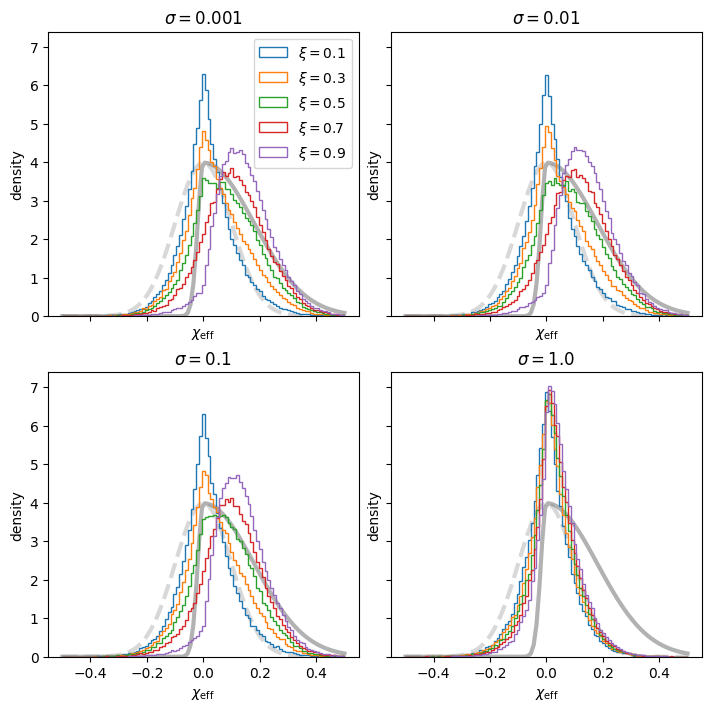

In [22]:
sigs = [1e-3, 1e-2, 1e-1, 1e0]
xis = [0.1, 0.3, 0.5, 0.7, 0.9]

bins = np.linspace(-0.5, 0.5, 100)
ks = dict(histtype='step', bins=bins, density=True)

rng = np.random.default_rng(3)

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(7, 7), layout='constrained')

for i, (sig, ax) in enumerate(zip(sigs, axes.flat)):
    ax.plot(
        bins,
        skewtruncnorm(bins, mu=0, sigma=0.1, skew=-0.8, high=1, low=-1), #truncnorm(bins, 0, 0.1, 1, -1),
        color='black',
        linewidth=3,
        alpha=0.3
    )

    ax.plot(
        bins,
        truncnorm(bins, 0, 0.1, 1, -1),
        color='grey',
        linewidth=3,
        alpha=0.3,
        linestyle='--'
    )

    for xi in xis:
        ct1, ct2 = sample_iso_gauss_spin_tilt(rng, xi, sig, n=n)
        chi_eff = calc_chieff(q, a1, a2, ct1, ct2)
        label = r'$\xi = ' + str(xi) + '$' if i == 0 else ''
        ax.hist(chi_eff, label=label, **ks)

        ax.set_title(r'$\sigma = ' + str(sig) + '$')
        ax.set_ylabel('density')
        ax.set_xlabel(r'$\chi_{\rm eff}$')

        if i == 0:
            ax.legend()

uniform distribution of spin magnitudes

In [86]:
rng = np.random.default_rng(4)
a1, a2 = rng.uniform(size=(2, n))

Text(0.5, 0, '$a_{1,2}$')

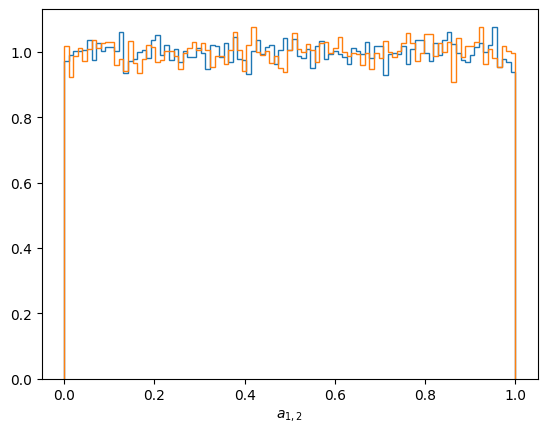

In [87]:
bins = np.linspace(0, 1, 100)
ks = dict(histtype='step', bins=bins, density=True)

fig, ax = plt.subplots()
ax.hist(a1, **ks)
ax.hist(a2, **ks)

ax.set_xlabel(r'$a_{1,2}$')

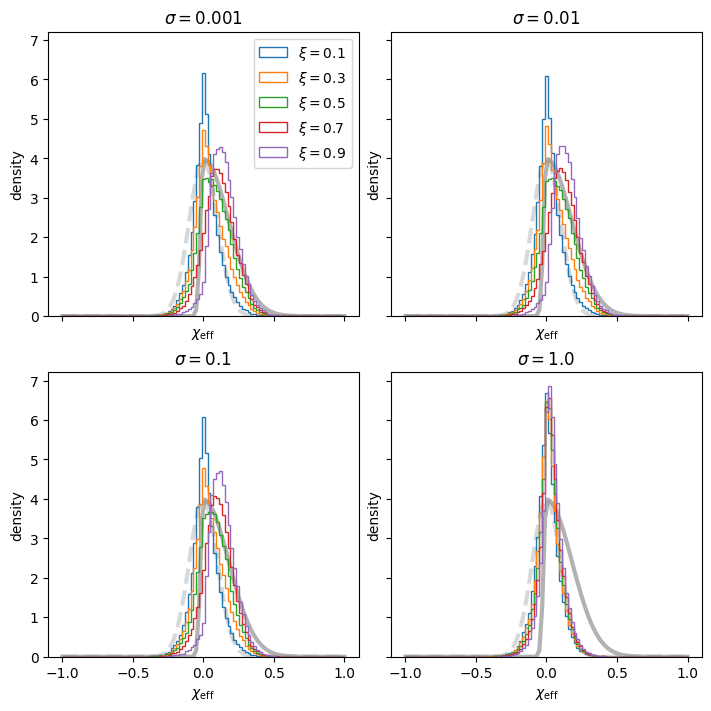

In [23]:
sigs = [1e-3, 1e-2, 1e-1, 1e0]
xis = [0.1, 0.3, 0.5, 0.7, 0.9]

bins = np.linspace(-1, 1, 100)
ks = dict(histtype='step', bins=bins, density=True)

rng = np.random.default_rng(3)

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(7, 7), layout='constrained')

for i, (sig, ax) in enumerate(zip(sigs, axes.flat)):
    ax.plot(
        bins,
        skewtruncnorm(bins, mu=0, sigma=0.1, skew=-0.8, high=1, low=-1), #truncnorm(bins, 0, 0.1, 1, -1),
        color='black',
        linewidth=3,
        alpha=0.3
    )

    ax.plot(
        bins,
        truncnorm(bins, 0, 0.1, 1, -1),
        color='grey',
        linewidth=3,
        alpha=0.3,
        linestyle='--'
    )

    for xi in xis:
        ct1, ct2 = sample_iso_gauss_spin_tilt(rng, xi, sig, n=n)
        chi_eff = calc_chieff(q, a1, a2, ct1, ct2)
        label = r'$\xi = ' + str(xi) + '$' if i == 0 else ''
        ax.hist(chi_eff, label=label, **ks)

        ax.set_title(r'$\sigma = ' + str(sig) + '$')
        ax.set_ylabel('density')
        ax.set_xlabel(r'$\chi_{\rm eff}$')

        if i == 0:
            ax.legend()